Check for missing data, extreme values, outliers. 

Usual suspects when you look at values: the appearance of groups, skewness, appearance of unexpected values, where are the data values centered and how widely are values separated. 


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import dataframe from csv file
df = pd.read_csv('data/eda_housing_market.csv')


             price  bedrooms  bathrooms  sqft_living     sqft_lot    floors  \
count    21,597.00 21,597.00  21,597.00    21,597.00    21,597.00 21,597.00   
mean    540,296.57      3.37       2.12     2,080.32    15,099.41      1.49   
std     367,368.14      0.93       0.77       918.11    41,412.64      0.54   
min      78,000.00      1.00       0.50       370.00       520.00      1.00   
25%     322,000.00      3.00       1.75     1,430.00     5,040.00      1.00   
50%     450,000.00      3.00       2.25     1,910.00     7,618.00      1.50   
75%     645,000.00      4.00       2.50     2,550.00    10,685.00      2.00   
max   7,700,000.00     33.00       8.00    13,540.00 1,651,359.00      3.50   

       condition     grade  sqft_above  sqft_basement  sqft_living15  \
count  21,597.00 21,597.00   21,597.00      21,145.00      21,597.00   
mean        3.41      7.66    1,788.60         291.86       1,986.62   
std         0.65      1.17      827.76         442.49         685.23   


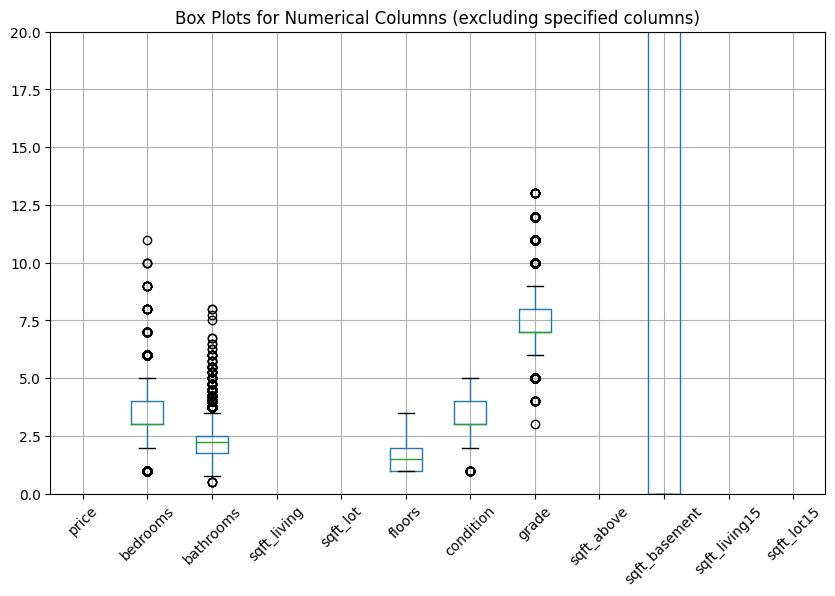

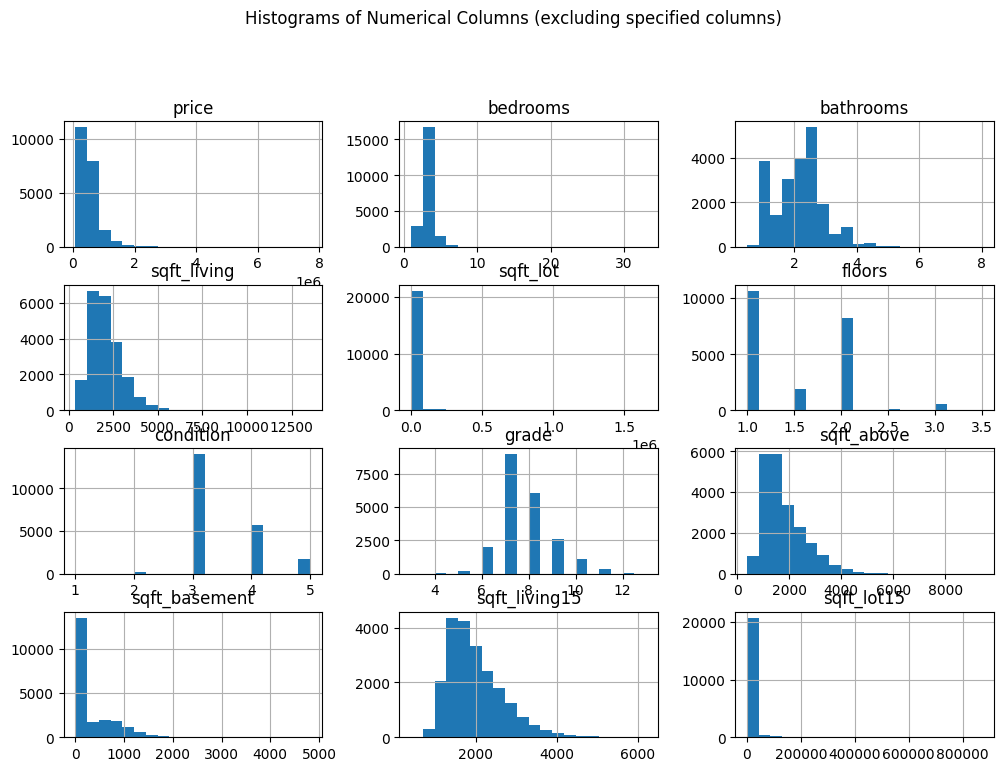

In [27]:
# check for missing data
df.isnull().sum()

# the columns with missing data are: waterfront, view, yr_renovated, sqft_basement
# how many values are missing in each column in percentage
df.isnull().sum()/len(df)*100

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# List of numerical columns excluding specified columns
exclude_columns = ['house_id', 'zipcode', 'yr_renovated', 'yr_built', 'waterfront', 'lat', 'long', 'view']
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Print summary statistics
print(summary_stats)

# Plot box plots for numerical columns
df[numerical_columns].boxplot(figsize=(10, 6))
plt.title("Box Plots for Numerical Columns (excluding specified columns)")
plt.xticks(rotation=45)
plt.ylim(0, 20)  # Set y-axis limit
plt.show()

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Columns (excluding specified columns)", y=1.02)
plt.show()





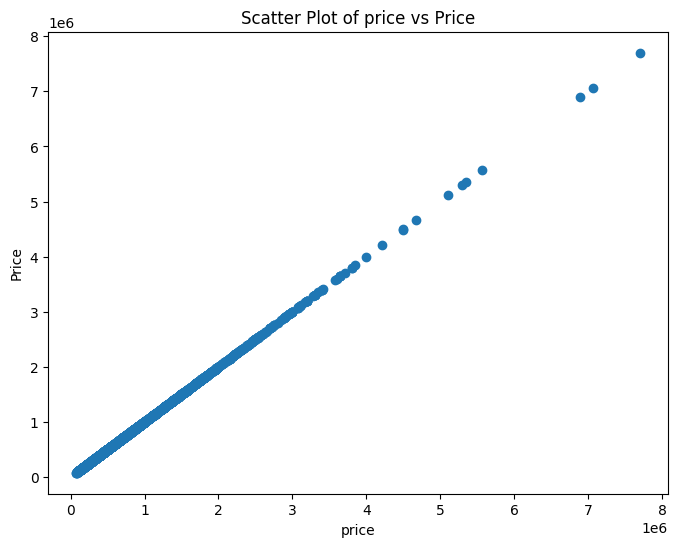

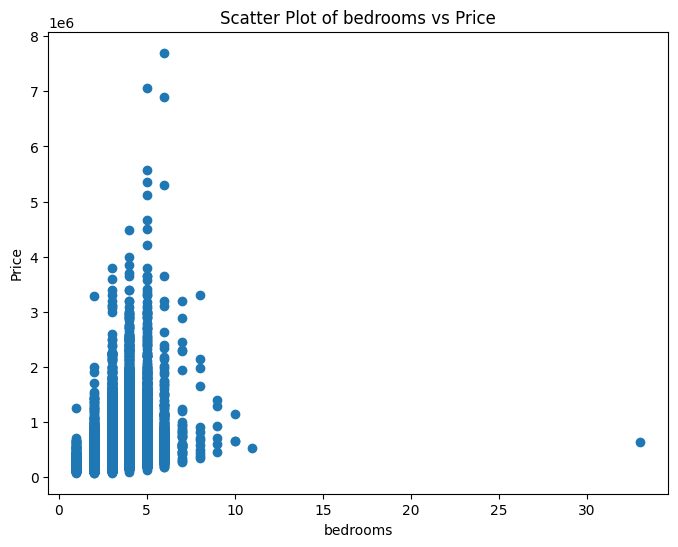

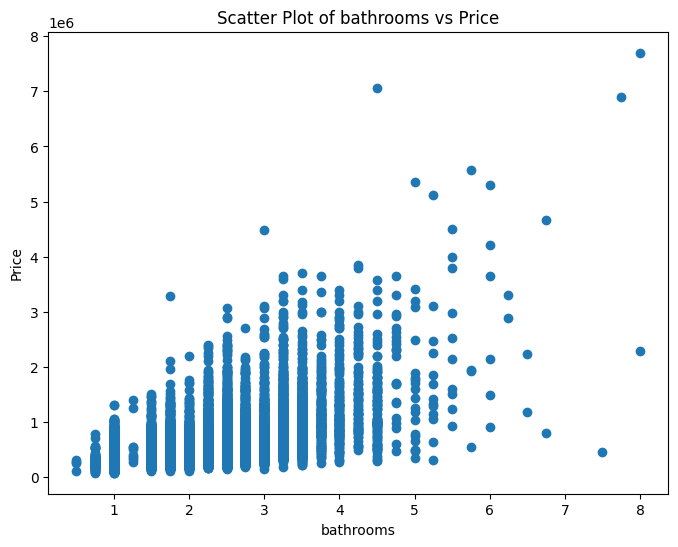

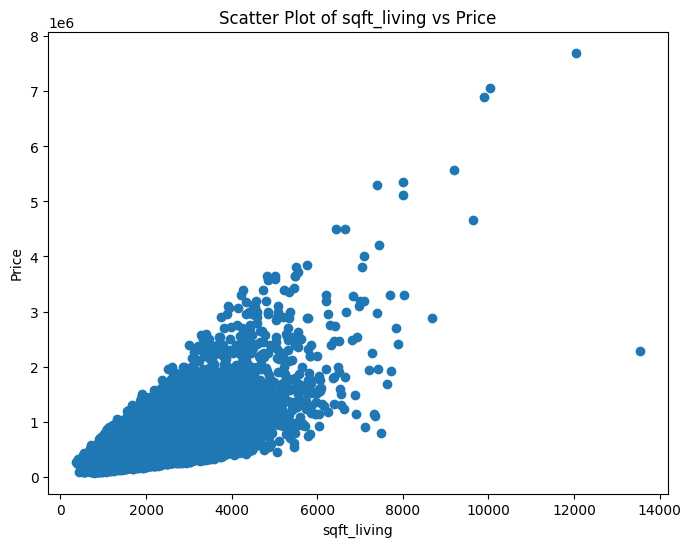

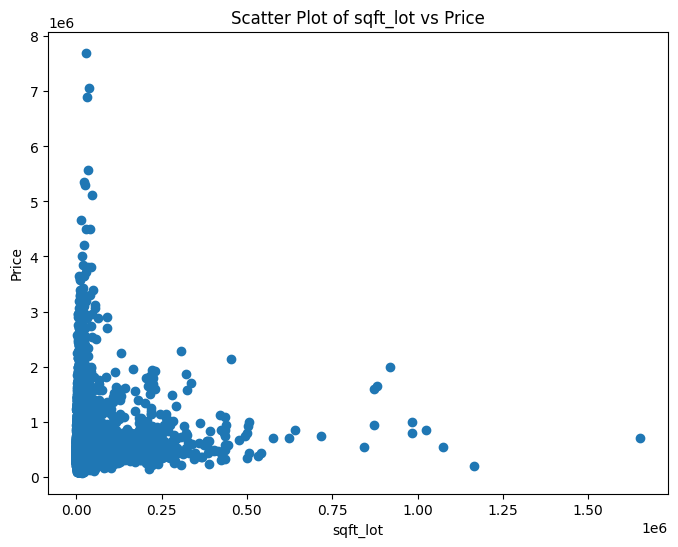

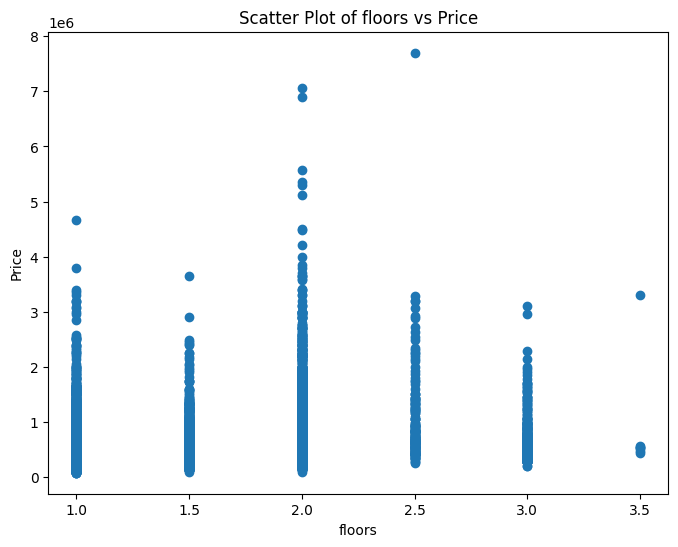

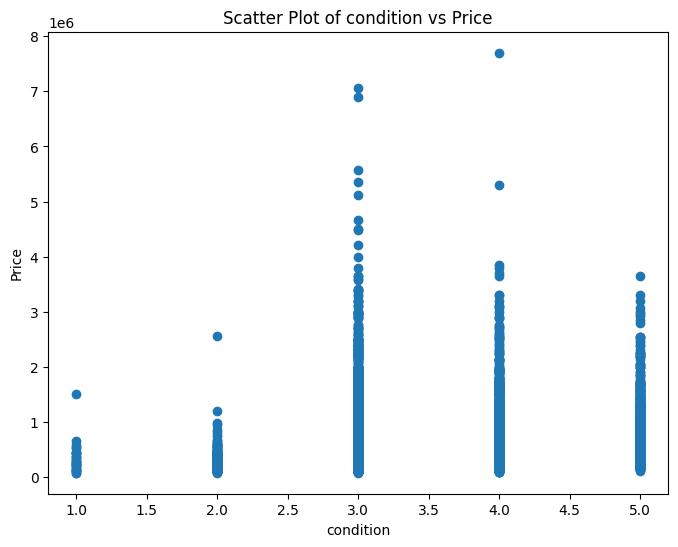

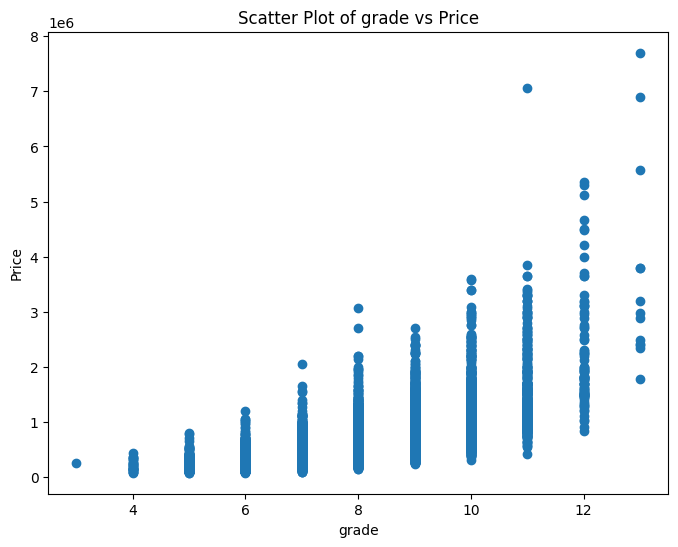

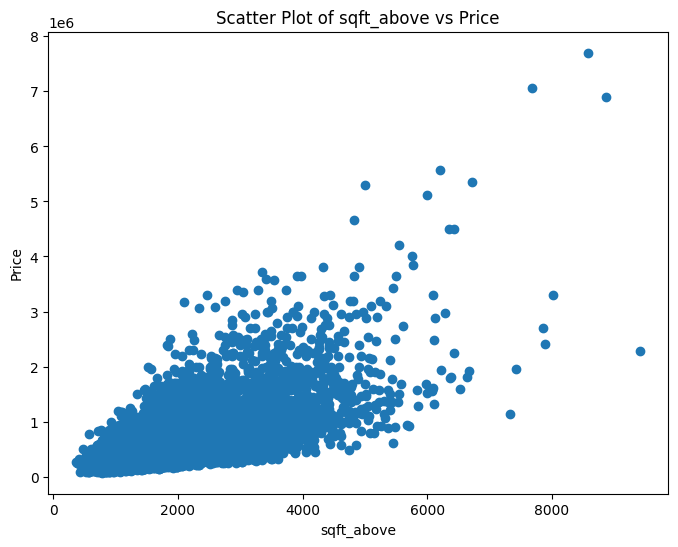

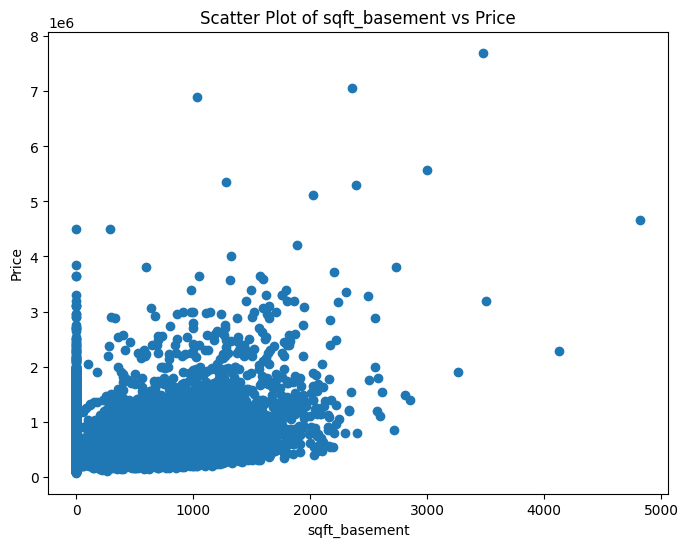

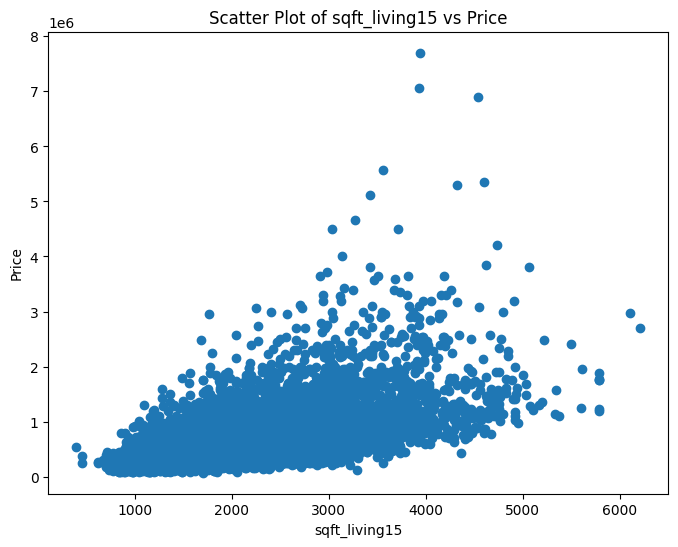

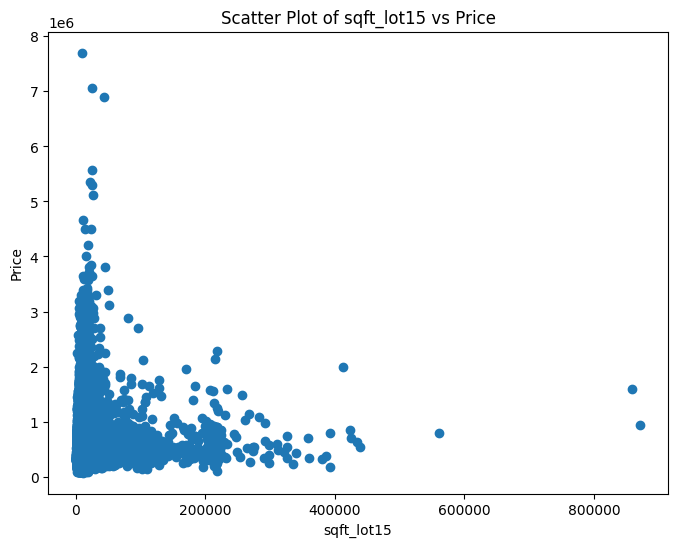

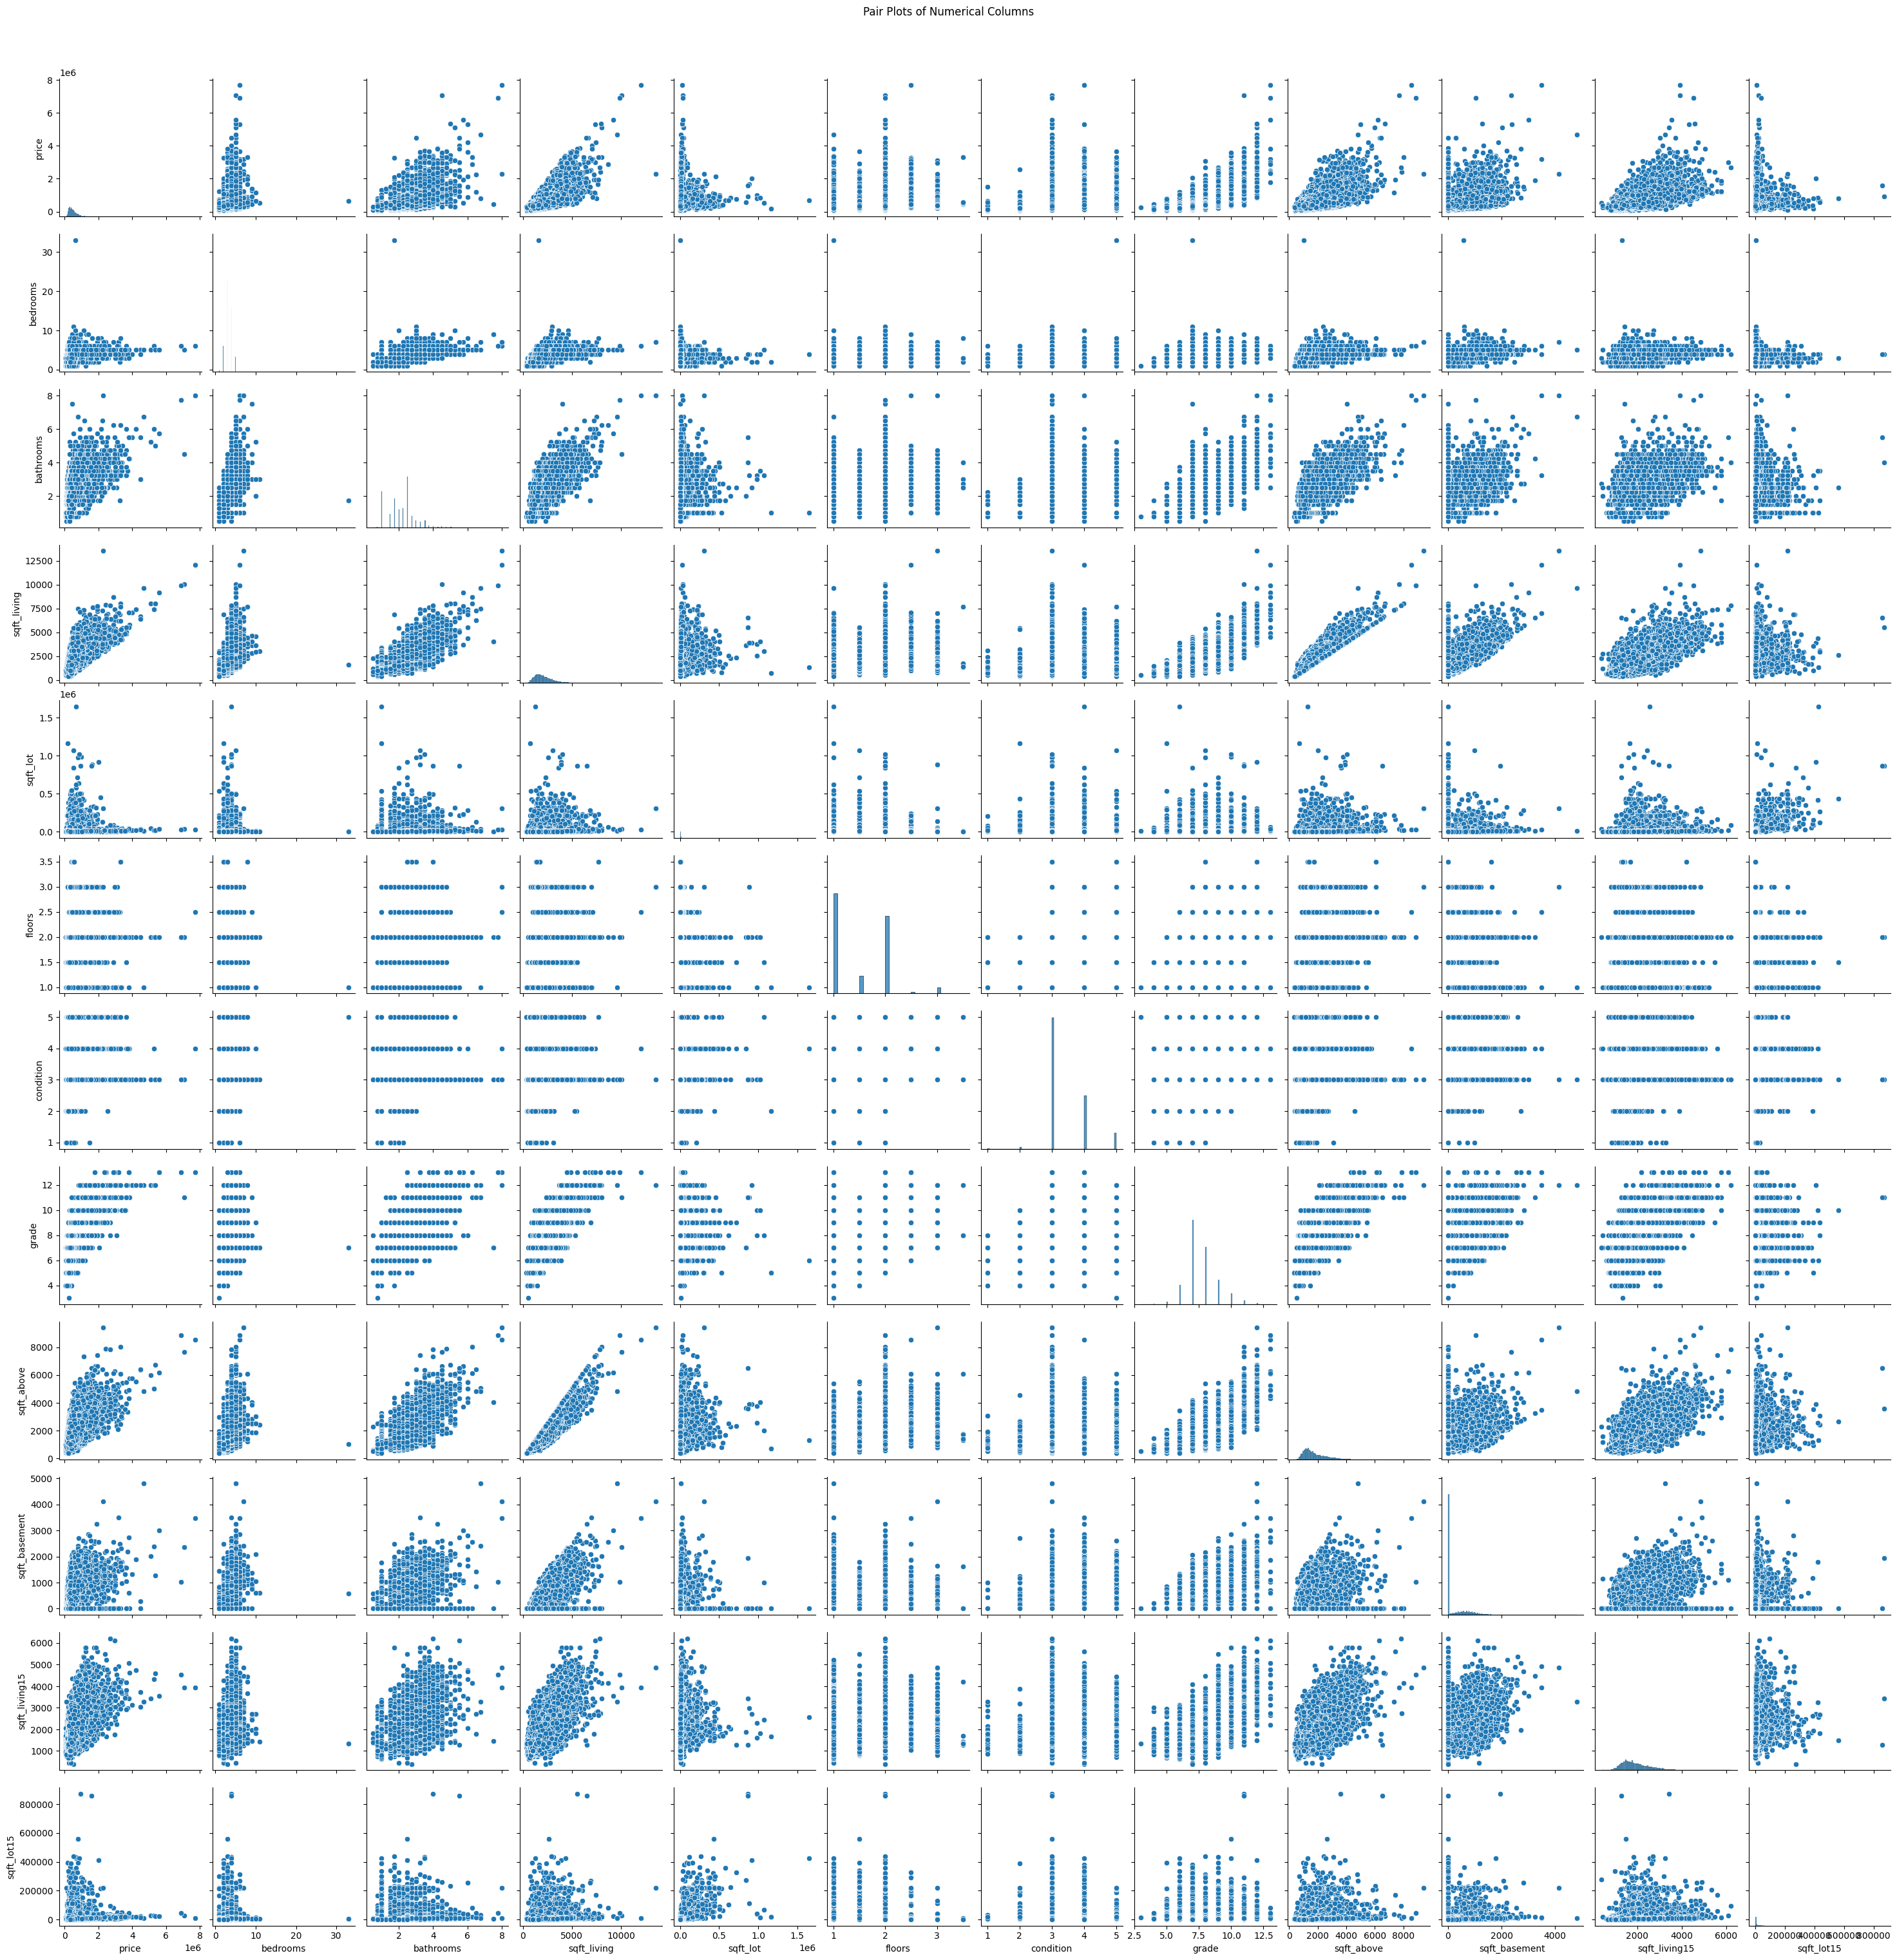

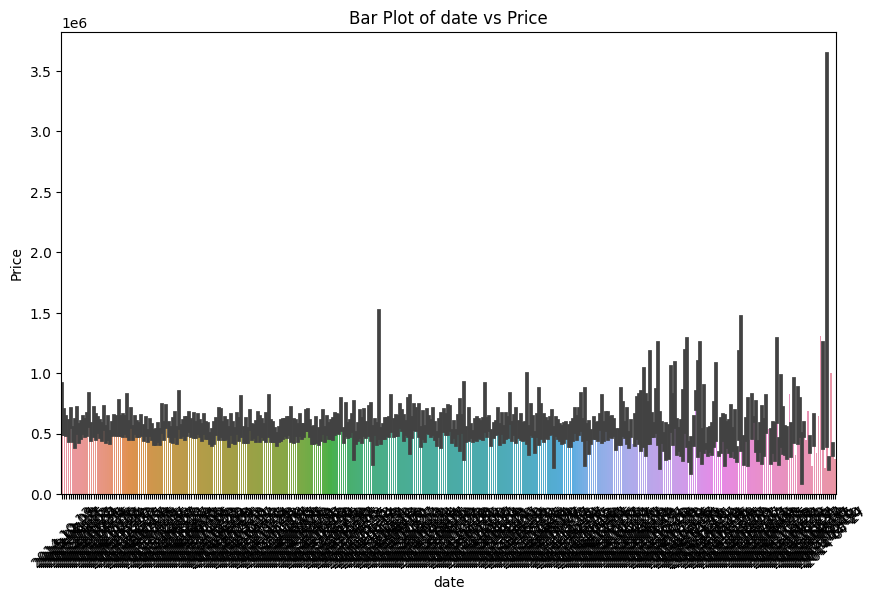

In [19]:
# List of numerical columns excluding specified columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Analyze Grouping and Relationships with Scatter Plots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df['price'])
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

# Analyze Grouping and Relationships with Pair Plots
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plots of Numerical Columns", y=1.02)
plt.show()

# Analyze Grouping and Relationships with Bar Plots
categorical_columns = df.select_dtypes(include=['object']).columns
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_col, y='price', data=df)
    plt.title(f'Bar Plot of {cat_col} vs Price')
    plt.xticks(rotation=45)
    plt.ylabel('Price')
    plt.show()
